In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path


In [2]:
cleaned_df = pd.read_csv(Path('../resources/combined_cleaned.csv'))
cleaned_df.head()

,Unnamed: 0,index,type,avg_price,total_volume_price,4046_units,4225_units,4770_units,total_bags,s_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,0,5616,1,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5617,0,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5618,1,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5619,0,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5620,1,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
cleaned_df = cleaned_df.drop(columns=['Unnamed: 0', 'index'], axis=1)
cleaned_df.head()

,type,avg_price,total_volume_price,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Carolina,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico
0,1,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
price_bins = [0.44, 1.14, 1.37, 1.63, 3.17]
group_names = ["0", "1", "2", "3" ]

cleaned_cat_df = cleaned_df.copy()

# Categorize prices for NB.
cleaned_cat_df["price_cat"] = pd.cut(cleaned_cat_df['avg_price'], price_bins, labels=group_names)

cleaned_cat_df.head()

,type,avg_price,total_volume_price,4046_units,4225_units,4770_units,total_bags,s_bags,l_bags,xl_bags,...,geography_South Central,geography_Southeast,geography_Spokane,geography_St. Louis,geography_Syracuse,geography_Tampa,geography_Total U.S.,geography_West,geography_West Tex/New Mexico,price_cat
0,1,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0,1.47,4140.95,7.30,301.87,0.00,3831.78,3831.78,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,1,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,1.54,3346.54,14.67,253.01,0.00,3078.86,3078.86,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,1,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [5]:
cleaned_cat_df['price_cat'].value_counts()

0    4282
1    3838
2    3681
3    3039
Name: price_cat, dtype: int64

In [10]:
cleaned_cat_df.columns

Index(['type', 'avg_price', 'total_volume_price', '4046_units', '4225_units',
       '4770_units', 'total_bags', 's_bags', 'l_bags', 'xl_bags',
       ...
       'geography_South Central', 'geography_Southeast', 'geography_Spokane',
       'geography_St. Louis', 'geography_Syracuse', 'geography_Tampa',
       'geography_Total U.S.', 'geography_West',
       'geography_West Tex/New Mexico', 'price_cat'],
      dtype='object', length=267)

In [7]:
def SSClassModel4(X, y):
    import pandas as pd
    from path import Path
    from sklearn import tree
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    import graphviz
    
    # split train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.70)
    
    # Creating a StandardScaler instance.
    scaler = StandardScaler()
    # Fitting the Standard Scaler with the training data.
    X_scaler = scaler.fit(X_train)
    
    # Scaling the data.
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    # Creating the decision tree classifier instance.
    model = tree.DecisionTreeClassifier()
    # Fitting the model.
    model = model.fit(X_train_scaled, y_train)
    
    tree.plot_tree(model)
    
    # Making predictions using the testing data.
    predictions = model.predict(X_test_scaled)
    print(f"Predictions: {predictions}")
    
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Create a DataFrame from the confusion matrix.
    cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1", "Actual 2", "Actual 3"],
                         columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3"])
    cm_df
    
    # Calculating the accuracy score.
    acc_score = accuracy_score(y_test, predictions)
    
    # Displaying results
    print("Confusion Matrix")
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print("Classification Report")
    print(classification_report(y_test, predictions))
    

Predictions: ['2' '0' '3' ... '3' '1' '3']
Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1246,0,0,0
Actual 1,0,1132,0,0
Actual 2,0,0,1172,0
Actual 3,0,0,0,902


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1246
           1       1.00      1.00      1.00      1132
           2       1.00      1.00      1.00      1172
           3       1.00      1.00      1.00       902

    accuracy                           1.00      4452
   macro avg       1.00      1.00      1.00      4452
weighted avg       1.00      1.00      1.00      4452



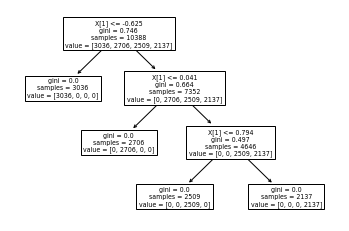

In [9]:
y = cleaned_cat_df['price_cat']
X = cleaned_cat_df.drop(columns=['price_cat', 'total_volume_prod', 'total_volume_price'], axis=1)

SSClassModel4(X, y)

Predictions: ['2' '0' '3' ... '2' '1' '3']
Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3
Actual 0,1014,199,24,9
Actual 1,196,716,197,23
Actual 2,36,232,713,191
Actual 3,5,31,157,709


Accuracy Score : 0.7079964061096137
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1246
           1       0.61      0.63      0.62      1132
           2       0.65      0.61      0.63      1172
           3       0.76      0.79      0.77       902

    accuracy                           0.71      4452
   macro avg       0.71      0.71      0.71      4452
weighted avg       0.71      0.71      0.71      4452



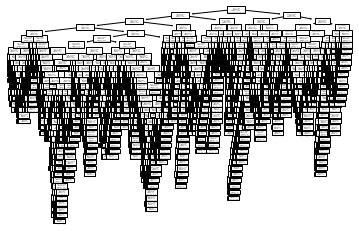

In [11]:
y = cleaned_cat_df['price_cat']
X = cleaned_cat_df.drop(columns=['price_cat', 'avg_price', 'total_volume_prod', 'total_volume_price'], axis=1)

SSClassModel4(X, y)